<a href="https://colab.research.google.com/github/Siri2191/study_area/blob/main/Dados_de_Alta_dimensionalidade_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
resultados_exames = pd.read_csv('aluracare.csv')
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

#classificador = RandomForestClassifier(n_estimators=100)
#classificador.fit(treino_x,treino_y)
#print(classificador.score(teste_x,teste_y)) 

# Existem valores vazios nos dados de treino e teste, por isto não se consegue criar o algoritmo. devemos trata-los

# **Trabalhando com valores vazios**


In [ ]:
# contando numero de celular vazias em cada coluna

resultados_exames.isnull().sum()  

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns='exame_33') # dropando a coluna com mais NaN

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x,treino_y)
print('Resultado da classificação %.2f%%' %((classificador.score(teste_x,teste_y))*100)) 

Resultado da classificação 92.40%


# Comparando o casiificador com o classiicador dummy

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143 
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x,treino_y)

print('Resultado da classificação bobo %.2f%%' %((classificador_bobo.score(teste_x,teste_y))*100)) 


Resultado da classificação bobo 66.67%


# Estudo de comportamento de variaveis

In [ ]:
dados_plot=pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot = pd.melt(dados_plot,id_vars='diagnostico',var_name='exames',value_name='valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

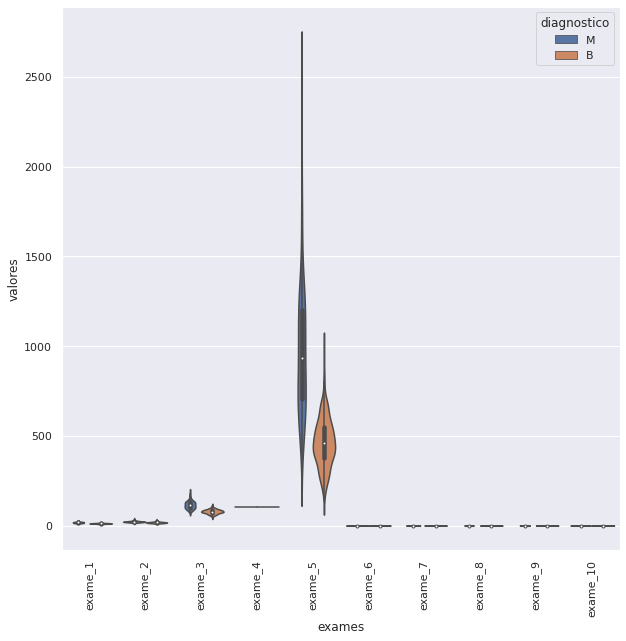

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot=pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot,id_vars='diagnostico',var_name='exames',value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= 'exames',
               y='valores',
               hue='diagnostico',
               data=dados_plot)

plt.xticks(rotation=90) # rotaciona os nomes dos eixos x

# Escalonando o grafico par auma melhor vizualização



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

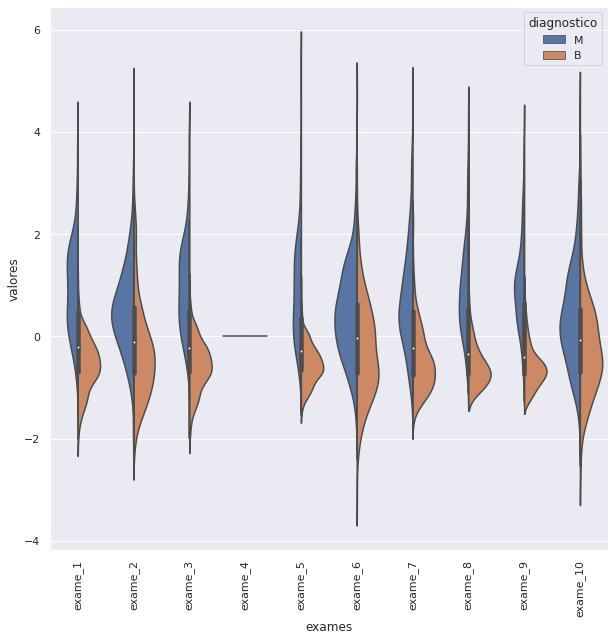

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, 
                                 columns = valores_exames_v1.keys())

dados_plot=pd.concat([diagnostico, 
                      valores_exames_v2.iloc[:,0:10]], 
                     axis=1)
dados_plot = pd.melt(dados_plot,
                     id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= 'exames',
               y='valores',
               hue='diagnostico',
               data=dados_plot,
               split=True)

plt.xticks(rotation=90) # rotaciona os nomes dos eixos x

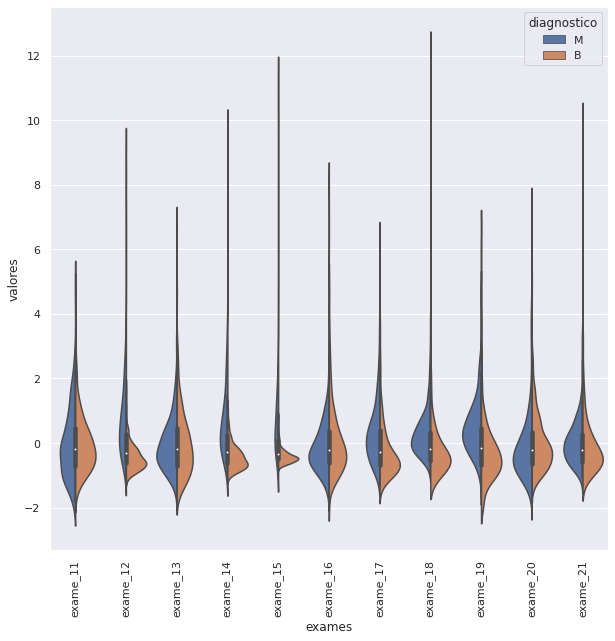

In [ ]:
def grafico_violino(valores,inicio,fim):
  
  dados_plot=pd.concat([diagnostico, 
                      valores.iloc[:,inicio:fim]], 
                     axis=1)
  dados_plot = pd.melt(dados_plot,
                      id_vars='diagnostico',
                      var_name='exames',
                      value_name='valores')

  plt.figure(figsize=(10,10))
  sns.violinplot(x= 'exames',
                y='valores',
                hue='diagnostico',
                data=dados_plot,
                split=True)

  plt.xticks(rotation=90) # rotaciona os nomes dos eixos x

grafico_violino(valores_exames_v2,10,21)

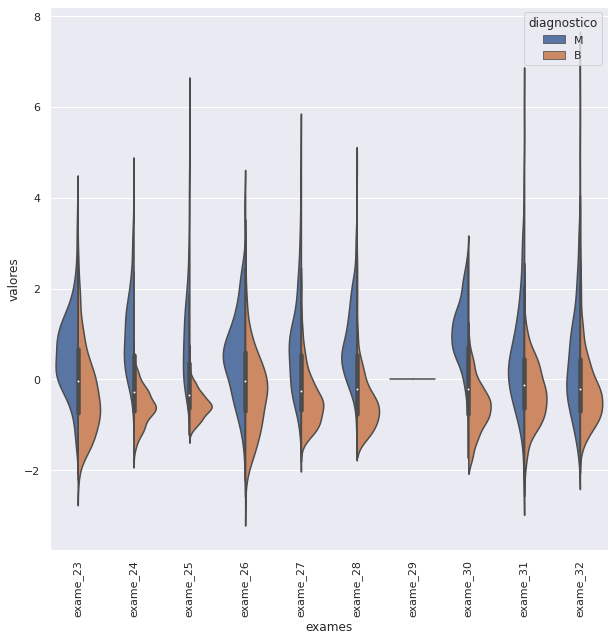

In [ ]:
grafico_violino(valores_exames_v2,22,32)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29','exame_4']) # retirando as colunas de exames constantes

def classificar(valores):
  
  SEED=1234 
  random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size=0.3)
  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x,treino_y)
  print('Resultado da classificação %.2f%%' %((classificador.score(teste_x,teste_y))*100)) 

classificar(valores_exames_v3) # classificando após o drop

Resultado da classificação 92.98%


# Analise de Correlação para grandes dimensões


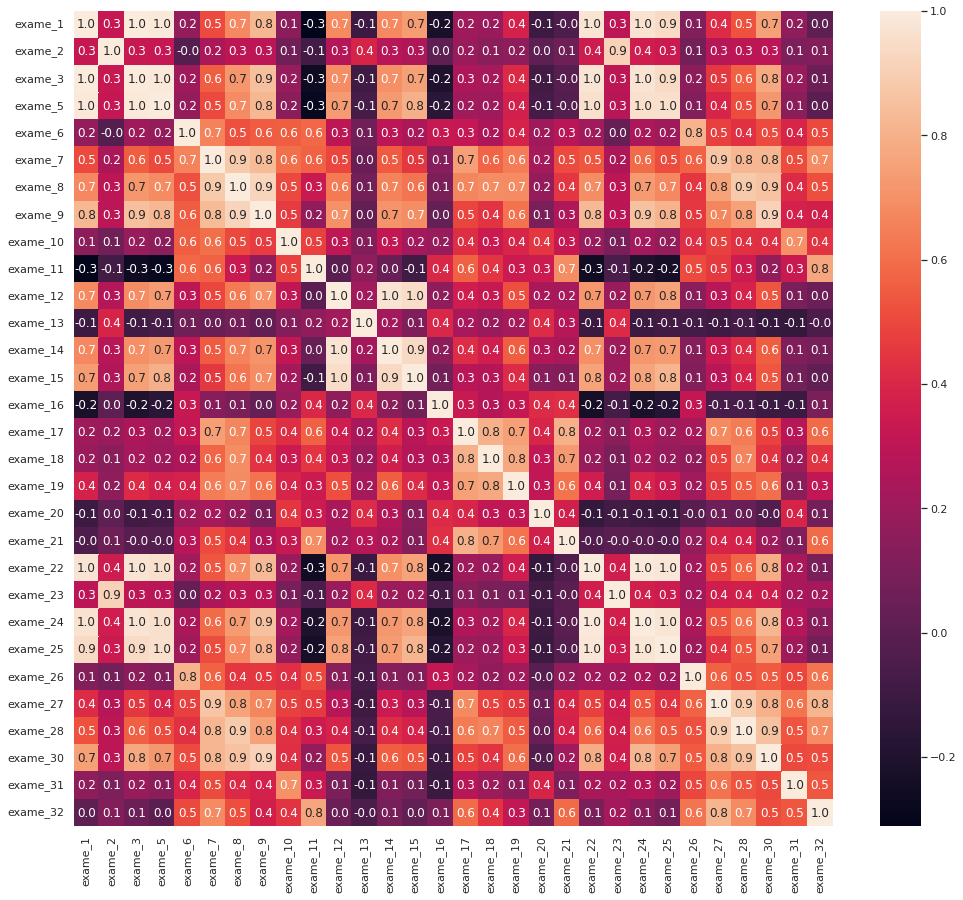

In [ ]:
matriz_correlacao=valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao,annot = True, fmt='.1f')

In [ ]:
matriz_correlaca_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlaca_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlaca_v1.sum()
matriz_correlacao_v2 

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionada = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionada # estas variaveis são muito correlacionadas entre elas, isto pode atrapalhar a regressão

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionada.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
classificar(valores_exames_v4)  # medindo acuracia com as alteraçõeas

Resultado da classificação 91.81%


In [ ]:
valores_exames_v5= valores_exames_v3.drop(columns=['exame_3','exame_24']) # retirando apenas algumas das correlacionadas
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


# Utilizando um metodo de seleção de melhores variaveis

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [ ]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f5e6f4b85f0>)

In [ ]:
valores_exames_v6=valores_exames_v1.drop(columns=['exame_4','exame_29','exame_3','exame_24'])

In [ ]:
SEED = 1234
random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size=0.3)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [ ]:
treino_kbest.shape

(398, 5)

In [ ]:
classificador = RandomForestClassifier(n_estimators=100,random_state=1234)   
classificador.fit(treino_kbest,treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 92.40%


# Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))


matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(30.5, 0.5, 'Real'), Text(0.5, 12.5, 'Predição')]

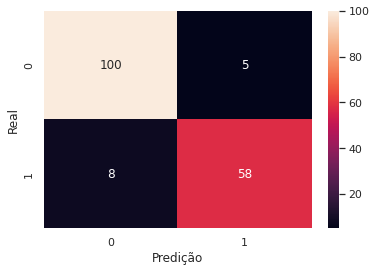

In [ ]:
sns.set()
sns.heatmap(matriz_confusao,annot = True, fmt='d').set(xlabel='Predição',ylabel='Real')

# Metodo RFE para seleçao de varivel


In [ ]:
from sklearn.feature_selection import RFE

Resultado da classificação 90.06%


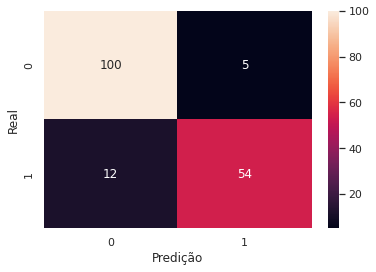

In [ ]:
SEED = 1234
random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100,random_state=1234)   
classificador.fit(treino_x,treino_y)

selecionador_rfe = RFE(estimator = classificador  ,n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x,treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe,treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))

sns.set()
sns.heatmap(matriz_confusao,annot = True, fmt='d').set(xlabel='Predição',ylabel='Real')

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

# Metodo RFECV para escolha de variaveis

Resultado da classificação 92.98%


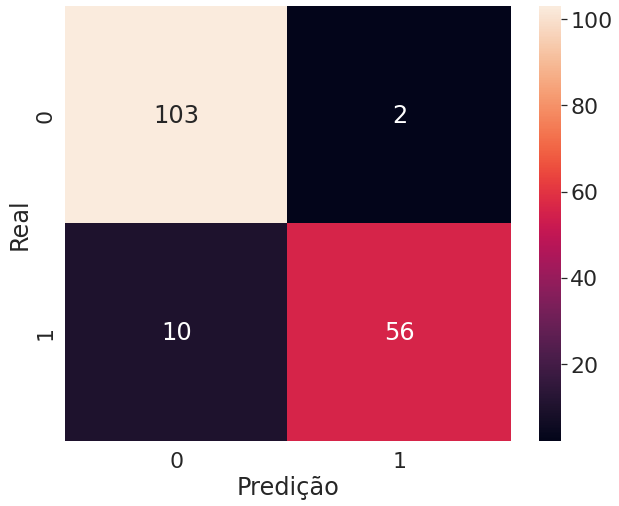

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [ ]:
# quais featcures ele selecionou

selecionador_rfecv.n_features_

26

In [ ]:
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show>

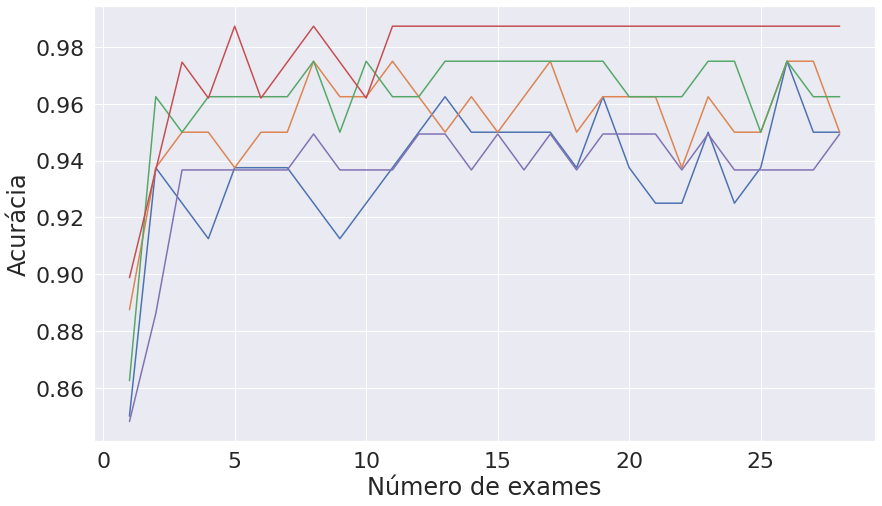

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show

# Metodos sem ser Feactures Selection

## reduzindo dimensionalidade para vizualização grafica : causa perda de informação

In [ ]:
SEED = 1234
random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100,random_state=1234)   
classificador.fit(treino_x,treino_y)

selecionador_rfe = RFE(estimator = classificador  ,n_features_to_select = 2, step = 1) 
# alterou o numero de features para reduzir dimensao

selecionador_rfe.fit(treino_x,treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe,treino_y)

valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

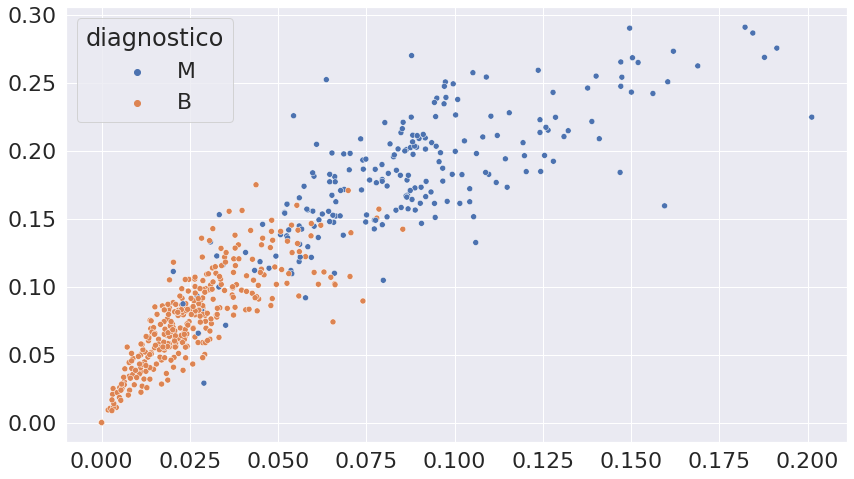

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0],y =valores_exames_v7[:,1] , hue = diagnostico )

 ## Tecnica PCA - seleciona as variaveis de forma a mantes o maior nivel de informação nas primeiras variaveis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

In [ ]:
valores_exames_v8 #conjunto de dados reduzidoa a 2 dimensoess

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

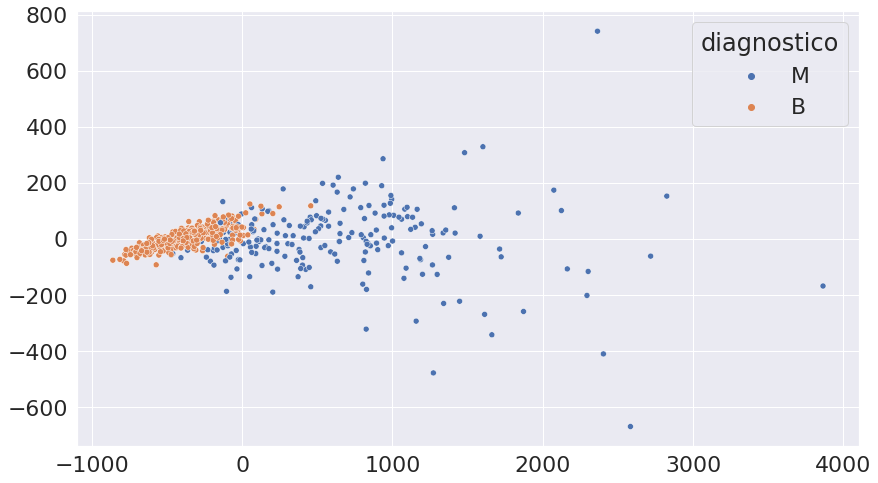

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0],y =valores_exames_v8[:,1] , hue = diagnostico )

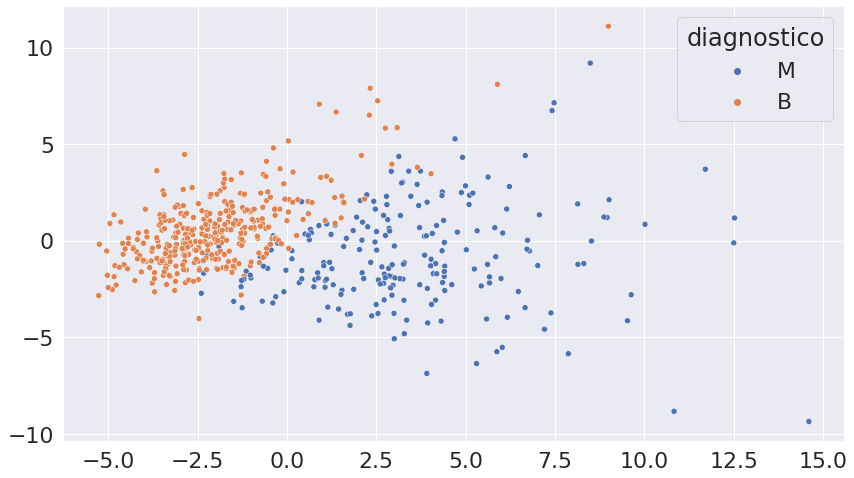

In [ ]:
# o pca funciona melhor com dador padronizados

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5) # tabela com os dados padronizados

plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0],y =valores_exames_v8[:,1] , hue = diagnostico )

# Tecnica TNSE - Ele padroniza a distancia entre valores max e minimo  de cada linha independente da variaaves

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


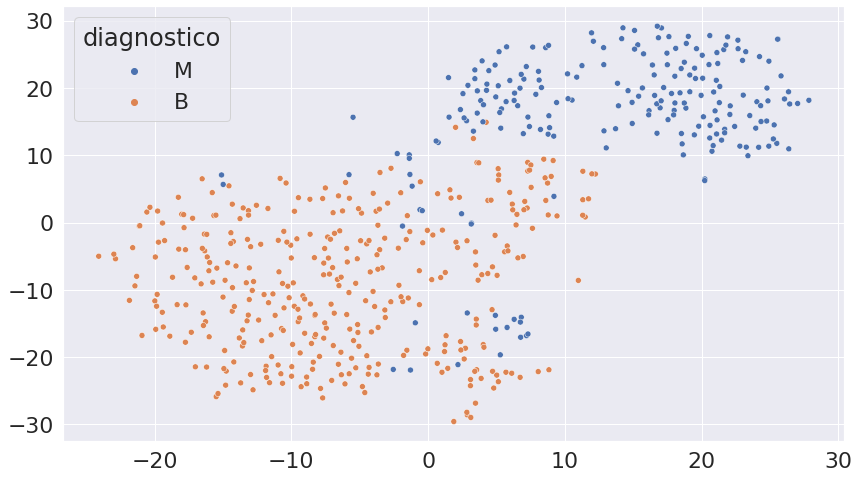

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0],y =valores_exames_v9[:,1] , hue = diagnostico )